# Desafio parte 2, Team 2: 
### Integrantes: Francisco de Asis dos Santos Silva, Josué Marinho Hinrichs e Leidy Milena Leal Abril



 Neste desafio usamos el aprendizado de maquina para clasificar setencas do setor financiero como positivas, negativas ou neutras. Na primera parte encontraremos a análise exploratoria dos dados mostrando o numero total de sentencas usadas para cada sentimento, o conteo de palavras, o numero de adjetivos usados en cada sentenca e alguns graficos correspondentes. Na segunda parte, nós centraremos no tratamento dos dados realizando tokenizacao e eliminando palavras stop. Por fim, nós exploramos alguns algoritmos de aprendizado de maquina e usamos o algoritmo ... para treinar a maquina com o -- % das sentencas.  Validamos o modelo. A continuacao mostramos o paso a paso para conseguir o objetivo.


Importamos as livrarias e pacotes:

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leidy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Importamos o dataset que vamos usar para treinar a maquina:

In [3]:
dataset = pd.read_csv('./data.csv')
dataset.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## a) Exploratory analysis

#### - Initial analysis of data:
We use info() to obtain the total number of columns and raws as well as the type:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


#### - Verifying missing values. 
If there are some missing values we shall remove the corresponding row in the next item.

In [5]:
valores_faltantes = dataset.isnull().sum()
print(valores_faltantes)

Sentence     0
Sentiment    0
dtype: int64


#### - Description of data:
We use describe() to obtain information more detailed about the dataset:

In [6]:
dataset.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


#### - Repeated cells?
If there are repeated rows we shall remove in the next section.

In [7]:
duplicates=dataset.duplicated(keep=False)
duplicate_rows=dataset[duplicates]
duplicate_rows

,Sentence,Sentiment
629,Proha Plc ( Euronext :7327 ) announced today (...,neutral
815,SSH Communications Security Corporation is hea...,neutral
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2234,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
2553,The issuer is solely responsible for the conte...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3079,The company serves customers in various indust...,neutral
3272,The company serves customers in various indust...,neutral
3353,The report profiles 614 companies including ma...,neutral


#### - Sentiments distribution:
We count the type of sentiments and determine the percentage of each sentiment. Also, we plot a histogram to show the results:

/tmp/ipykernel_24503/1824531122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure=sns.countplot(x=dataset['Sentiment'],order=dataset['Sentiment'].value_counts(ascending=False).index,palette="CMRmap_r",saturation=0.9)


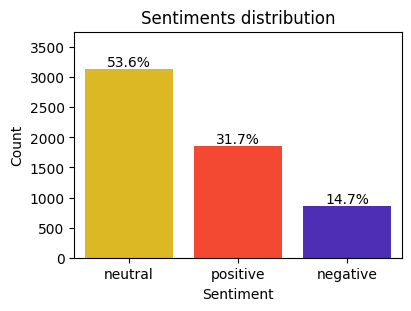

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [8]:
fig=plt.figure(figsize=(4,3),constrained_layout=True)
#c=sns.countplot(x='Sentiment', data=dataset,palette="CMRmap_r",saturation=1)
figure=sns.countplot(x=dataset['Sentiment'],order=dataset['Sentiment'].value_counts(ascending=False).index,palette="CMRmap_r",saturation=0.9)
total=dataset['Sentiment'].count()
for i in range(3):
    figure.bar_label(figure.containers[i],fmt=lambda x: f'{(x/total)*100:0.1f}%')
figure.margins(y=0.2)
figure.set(xlabel='Sentiment',ylabel='Count',title='Sentiments distribution')
plt.savefig('Sentiments_distribution.png',dpi=300)
plt.show()

dataset['Sentiment'].value_counts()

#### Exploring the length of texts (string):
We obtain information about the first column i.e 'Sentences':

In [9]:
dataset['length_text'] = dataset['Sentence'].apply(len)
dataset['length_text'].describe()

count    5842.000000
mean      117.020712
std        56.417790
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: length_text, dtype: float64

##### Boxplot of the full text:

<Axes: ylabel='length_text'>

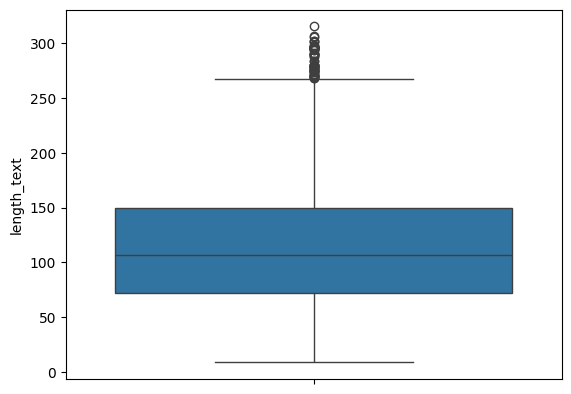

In [160]:
sns.boxplot(dataset['length_text'])

##### Histograma

<Axes: xlabel='length_text', ylabel='Count'>

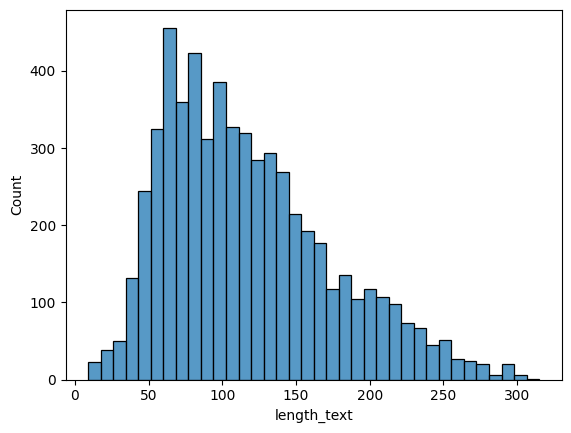

In [10]:
sns.histplot(dataset['length_text'])

### - Length of the text by group:
We classify the text by sentiment and obtain the leght of the text:

In [11]:
#corr_matrix = dataset['length_text'].corr(dataset['Sentiment'], method='pearson')
# Criando o heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Heatmap de Correlação')
#plt.show()

In [292]:
dataset_tokens = []
stopwords = nltk.corpus.stopwords.words('english')

for entry in dataset['Sentence']:
    tokens = nltk.tokenize.word_tokenize(entry)
    dataset_tokens.append( [word for word in tokens if word not in stopwords and word.isalpha()] ) 

dataset_tokens[1]

['ESI', 'lows', 'BK', 'real', 'possibility']

In [293]:
# Quantos adjetivos tem  cada linha
nltk.download('averaged_perceptron_tagger')
new_col=[]
for linha in dataset_tokens:
    norm_words=[word.lower() for word in linha if word.isalpha()]
    ps_tagger=nltk.pos_tag(norm_words)
    #print(ps_tagger)
    #for i in ps_tagger:
    #    print(i[1])
    n_adj=len([i for i in ps_tagger if i[1]=='JJ'])
    print(n_adj)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/josuhinrichs/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


6
2
2
1
3
1
0
2
3
3
0
2
1
0
2
1
1
2
1
1
3
1
3
3
1
1
1
1
5
1
4
5
1
0
1
1
3
1
1
4
3
6
2
3
2
0
1
1
3
0
3
2
0
0
1
0
3
0
2
2
3
0
1
1
2
2
3
0
1
3
1
0
3
4
0
0
0
3
0
3
0
1
6
3
3
3
1
1
1
2
1
1
1
3
2
0
3
5
0
0
2
1
4
0
2
2
1
3
2
7
2
4
2
0
1
1
2
1
1
1
3
1
2
3
2
1
2
2
3
1
4
2
3
2
3
5
4
6
3
2
3
1
1
0
1
3
2
0
2
2
1
2
0
1
1
2
0
0
2
1
0
5
2
2
0
1
0
1
1
2
1
1
3
4
3
0
1
3
2
2
3
2
2
2
1
5
0
4
4
2
2
3
4
0
1
1
2
3
3
2
1
5
1
8
0
1
1
2
4
1
2
3
0
1
2
0
2
0
4
1
3
1
0
1
3
2
1
1
4
4
2
0
0
7
1
2
2
0
6
0
0
1
0
2
0
3
2
0
2
2
3
1
0
4
7
0
3
0
0
3
2
0
1
4
2
0
3
5
1
0
2
1
3
2
1
3
1
1
3
1
2
3
2
2
0
1
2
6
3
3
3
1
3
3
1
2
4
0
0
4
2
1
1
0
0
3
2
2
1
2
3
1
1
2
2
2
5
1
0
5
2
1
2
4
6
0
0
2
1
2
3
0
5
1
1
2
1
0
0
1
2
1
0
2
1
3
0
0
0
1
1
2
4
7
3
4
1
3
1
4
0
1
1
3
1
0
7
0
3
3
0
5
0
2
1
2
0
0
0
1
5
2
1
2
0
1
2
2
3
1
1
2
0
1
1
2
5
1
2
3
1
2
2
4
1
5
2
2
0
3
2
1
2
3
4
2
2
1
0
1
2
1
2
4
2
2
3
6
4
2
5
2
3
0
3
3
4
1
1
0
2
1
0
3
3
1
1
1
4
3
0
2
3
0
0
1
0
1
0
0
3
2
0
1
4
1
1
0
3
2
1
3
4
5
1
1
0
2
1
1
2
1
0
2
1
0
2
3
1
0
2
4
1
0
4
7
5
0
3
1


## b) Tratamento do dados